In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("../vacancies.csv")
df.head()

,title,company,salary_in_$,technologies,experience_level,link
0,Python Developer,HOLYWATER,Not specified,"Python,API",Junior,https://jobs.dou.ua/companies/holy-water/vacan...
1,Python Developer у Стартап,ESUPPORT,1000-2500,"Python,API",Junior,https://jobs.dou.ua/companies/esupport/vacanci...
2,🐍 Стажер Python Developer для УНКД 🐍,"ГО ""УНКД""",300-500,"Python,API",Junior,https://jobs.dou.ua/companies/nko-go-unkd/vaca...
3,Junior Python розробник,Apriorit,Not specified,"Python,Flask,AWS,Docker,Kubernetes,SQLAlchemy,...",Junior,https://jobs.dou.ua/companies/aprior-it/vacanc...
4,Senior Python Engineer (Django),Adwisely,3000-4000,"Python,Django,AWS,API,Docker,Kubernetes,Ansibl...",Lead,https://jobs.dou.ua/companies/adwisely/vacanci...


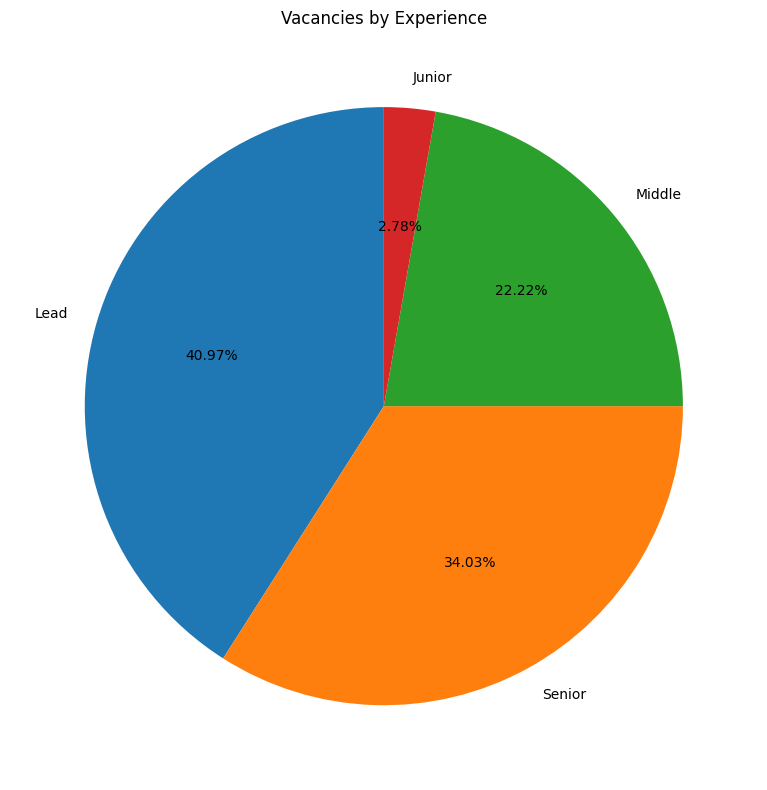

In [51]:
experience_counts = df["experience_level"].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(experience_counts, labels=experience_counts.index, autopct="%1.2f%%", startangle=90)
plt.title("Vacancies by Experience")
plt.tight_layout()
plt.savefig("../data/vacancies_by_experience.png")
plt.show()

In [55]:
def parse_salary(salary: str):
    if salary == "Not specified":
        return np.nan, np.nan

    try:
        if "-" in salary:
            min_salary, max_salary = map(int, salary.split("-"))
            return min_salary, max_salary
        else:
            salary = int(salary)
            return salary, salary
    except ValueError:
        return np.nan, np.nan


df[["min_salary", "max_salary"]] = df["salary_in_$"].apply(parse_salary).apply(pd.Series)
df.head()

,title,company,salary_in_$,technologies,experience_level,link,min_salary,max_salary
0,Python Developer,HOLYWATER,Not specified,"Python,API",Junior,https://jobs.dou.ua/companies/holy-water/vacan...,NaN,NaN
1,Python Developer у Стартап,ESUPPORT,1000-2500,"Python,API",Junior,https://jobs.dou.ua/companies/esupport/vacanci...,1000.0,2500.0
2,🐍 Стажер Python Developer для УНКД 🐍,"ГО ""УНКД""",300-500,"Python,API",Junior,https://jobs.dou.ua/companies/nko-go-unkd/vaca...,300.0,500.0
3,Junior Python розробник,Apriorit,Not specified,"Python,Flask,AWS,Docker,Kubernetes,SQLAlchemy,...",Junior,https://jobs.dou.ua/companies/aprior-it/vacanc...,NaN,NaN
4,Senior Python Engineer (Django),Adwisely,3000-4000,"Python,Django,AWS,API,Docker,Kubernetes,Ansibl...",Lead,https://jobs.dou.ua/companies/adwisely/vacanci...,3000.0,4000.0


In [56]:
experience_distribution = df["experience_level"].value_counts()

experience_salary = df.groupby("experience_level").agg({
    "min_salary": "mean",
    "max_salary": "mean"
}).reset_index()

experience_salary

,experience_level,min_salary,max_salary
0,Junior,650.000000,1500.000000
1,Lead,3500.000000,5083.333333
2,Middle,2050.000000,3250.000000
3,Senior,2446.666667,3280.000000


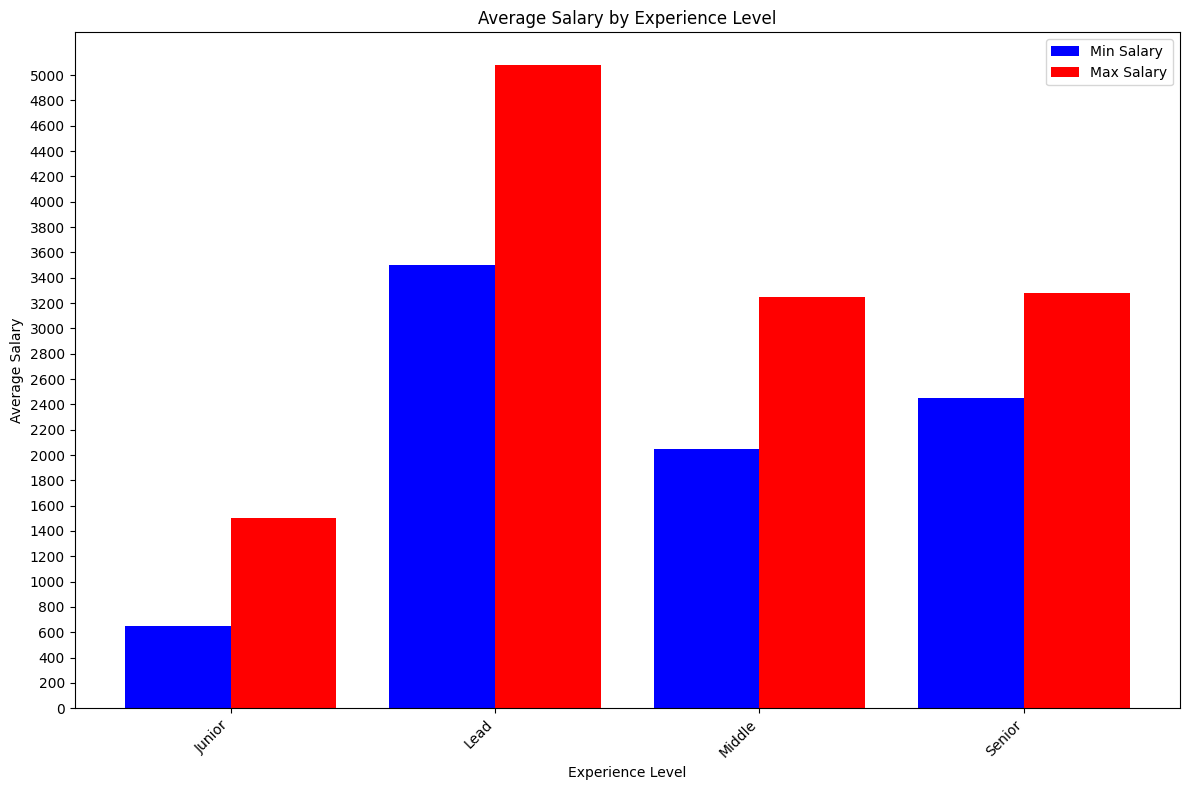

In [46]:
plt.figure(figsize=(12, 8))
x = np.arange(len(experience_salary["experience_level"]))
bar_width = 0.4
plt.bar(x - bar_width / 2, experience_salary["min_salary"], bar_width, color="blue", label="Min Salary")
plt.bar(x + bar_width / 2, experience_salary["max_salary"], bar_width, color="red", label="Max Salary")
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.xticks(rotation=45, ha="right")
plt.yticks(np.arange(0, max(experience_salary["max_salary"]), 200))
plt.xticks(x, experience_salary["experience_level"])

plt.legend()
plt.tight_layout()
plt.savefig("../data/salary_by_experience.png")
plt.show()

In [14]:
from collections import Counter

tech_list = df["technologies"].dropna().apply(lambda x: x.split(",")).explode()
tech_counter = Counter(tech_list)

tech_df = pd.DataFrame(tech_counter.items(), columns=["Technology", "Count"])
tech_df = tech_df.sort_values(by="Count", ascending=False)

tech_df

,Technology,Count
0,Python,141
1,API,107
4,Docker,76
9,GIT,55
3,AWS,55
10,Django,52
18,ML,48
12,PostgreSQL,48
5,Kubernetes,45
14,Redis,41


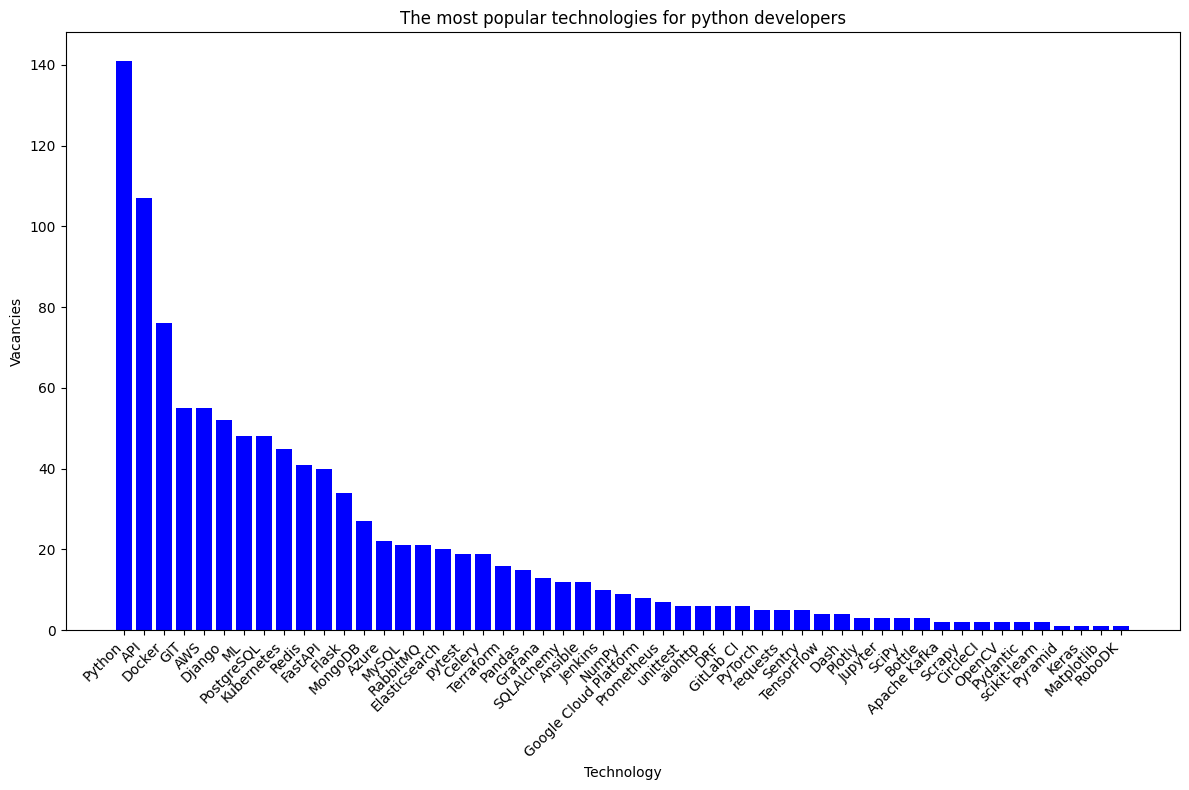

In [53]:
plt.figure(figsize=(12, 8))
plt.bar(tech_df["Technology"], tech_df["Count"], color="blue")
plt.title("The most popular technologies for python developers")
plt.xlabel("Technology")
plt.ylabel("Vacancies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("../data/most_popular_technologies.png")
plt.show()